In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sys

new_path = '/Volumes/data/analysis/20240229C/chunk4/kilosort2/kilosort2.globals'
sys.path.append('/Users/niloughazavi/Documents/GitHub/rgc_model/')
sys.path.append('/Users/niloughazavi/Documents/GitHub/datajoint/data_modules/')
sys.path.append('/Users/niloughazavi/Documents/GitHub/MEA/src/analysis/')
sys.path.append('/Users/niloughazavi/Documents/GitHub/MEA/src/analysis/symphony_data')

import data_utils as du

In [26]:
# Get display params for our experiment. Need chunk4 to get the display params from the noise analysis on NAS analysis dir.

# Get display params for our experiment. Need chunk4 to get the display params from the noise analysis on NAS analysis dir.

d_display, stim_indices = du.get_display_params('20250121C', ['data003'],
                                  str_chunk='chunk1', str_algo='kilosort4', str_chunk_path='/Volumes/data/analysis/20250121C/chunk1/kilosort4/')
stim_indices



array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161])

In [27]:
help(du.get_display_params)

Help on function get_display_params in module data_utils:

get_display_params(str_exp, str_filename, str_chunk='chunk1', str_algo='kilosort2', str_vcd_name=None, str_chunk_path=None)



In [13]:


d_display.keys()

dict_keys(['n_ht', 'n_wt', 'mu_per_pixel', 'pix_per_stix', 'mean_frame_rate', 'n_magnification_factor', 'duration_s', 'duration_frames', 'wait_s', 'wait_frames'])

In [14]:
d_display['mean_frame_rate']


59.94154881781792

In [15]:
import numpy as np
import os

n_stim_idx = 0
idx_imgname = 2
imageName = du.D_DOVES_DATA['FEMdata'][0, n_stim_idx][idx_imgname][0]
str_img_path = os.path.join(du.STR_DOVES_IMG_DIR, imageName)
print(f'Loading image {imageName} from {str_img_path}')
img_size = np.array([1024, 1536])
img = du.load_doves_img(str_img_path, shape=img_size)
type(img)

Loading image imk00031.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00031.iml


numpy.ndarray

In [18]:
# make doves movie takes d_display with a "n_stim_idx" key with value of the stimulusIndex to generate
stride = 2
i_stim = 0
stim_idx = stim_indices[i_stim]
d_display['n_stim_idx'] = stim_idx

movie, img = du.make_doves_movie(d_display=d_display,
                                 stride=stride, 
                                 b_ds_to_stix=True) # Downsample movie to noise stixel space

Getting stim index 1.
Using display params: {'n_ht': 1140, 'n_wt': 1824, 'mu_per_pixel': 3.34, 'pix_per_stix': 12, 'mean_frame_rate': 59.94154881781792, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 360, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 1}
Loading image imk00031.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00031.iml
Creating movie for imk00031.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [1140 1824]


100%|█████████████████████████████████████████| 300/300 [00:04<00:00, 62.48it/s]


Downsampling frames to [ 95 152]


100%|█████████████████████████████████████████| 300/300 [00:03<00:00, 98.39it/s]

Adding 60 wait frames to (300, 95, 152)
New frames shape: (360, 95, 152)
Upsampled frames to stride 2
New frames shape: (720, 95, 152, 1)


In [19]:
d_display.keys()

dict_keys(['n_ht', 'n_wt', 'mu_per_pixel', 'pix_per_stix', 'mean_frame_rate', 'n_magnification_factor', 'duration_s', 'duration_frames', 'wait_s', 'wait_frames', 'n_stim_idx'])

The returned movie array has values in the range (-1, 1). We can clip out the wait frames so the time axis lines up with psth.

In [20]:
n_wait_bins = d_display['wait_frames']*stride
movie = movie[n_wait_bins:] # Remove the waiting period
movie.shape

(600, 95, 152, 1)

In [21]:
print(f'Movie min: {movie.min():.2f}, max: {movie.max():.2f}')

Movie min: -0.93, max: 0.96


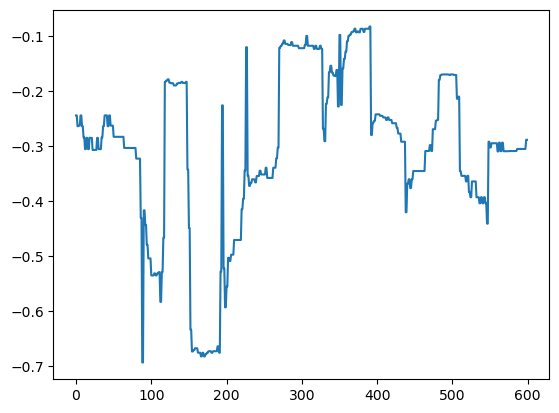

In [22]:
# Plot center pixel ts
import matplotlib.pyplot as plt
plt.plot(movie[:, movie.shape[1]//2, movie.shape[2]//2,0])

In [23]:
import numpy as np
import os
from tqdm import tqdm 

In [16]:
 # For progress bar


# All stimulus indices
stim_indices = np.arange(1,9)  # Creates array from 1 to 161 (1-162)

# Base display parameters (assuming d_display is already defined with other necessary parameters)
d_display = {}  # Initialize or use existing d_display

# Parameters
stride = 2
output_dir = "/Users/niloughazavi/Desktop/doves_movies_20230725C"  # Directory to save movies
b_ds_to_stix = True  # Downsample movie to noise stixel space

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)



In [17]:
# Get display params for our experiment. Need chunk4 to get the display params from the noise analysis on NAS analysis dir.

d_display, stim_indices = du.get_display_params('20230725C', ['data015'],
                                  str_chunk='chunk2', str_algo='kilosort2',str_chunk_path='/Volumes/data/analysis/20230725C/chunk2/kilosort2')


In [48]:
# Generate and save movies for all stimulus indices
for i_stim, stim_idx in enumerate(tqdm(stim_indices, desc="Generating DOVES movies")):
    # Update stimulus index in display parameters
    d_display['n_stim_idx'] = stim_idx
    
    movie, img = du.make_doves_movie(d_display=d_display,
                                     stride=stride, 
                                     b_ds_to_stix=True) # Downsample movie to noise stixel space
    

    movie_path = os.path.join(output_dir, f"doves_movie_{stim_idx}.npy")
    img_path = os.path.join(output_dir, f"doves_img_{stim_idx}.npy")
    
    np.save(movie_path, movie)
    np.save(img_path, img)
    
    # Optional: Print progress
    if (i_stim + 1) % 10 == 0:
        print(f"Processed {i_stim + 1}/{len(stim_indices)} stimuli")

print(f"All {len(stim_indices)} DOVES movies generated and saved to {output_dir}")

Generating DOVES movies:   0%|                            | 0/9 [00:00<?, ?it/s]

Getting stim index 2.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 2}
Loading image imk00031.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00031.iml
Creating movie for imk00031.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 200.76it/s]


Downsampling frames to [ 75 100]



Generating DOVES movies:  11%|██▏                 | 1/9 [00:02<00:19,  2.46s/it]

Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)
Getting stim index 6.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 6}
Loading image imk00034.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00034.iml
Creating movie for imk00034.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 202.20it/s]


Downsampling frames to [ 75 100]



Generating DOVES movies:  22%|████▍               | 2/9 [00:04<00:16,  2.41s/it]

Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)
Getting stim index 12.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 12}
Loading image imk00037.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00037.iml
Creating movie for imk00037.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 199.64it/s]


Downsampling frames to [ 75 100]



Generating DOVES movies:  33%|██████▋             | 3/9 [00:07<00:14,  2.40s/it]

Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)
Getting stim index 15.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 15}
Loading image imk00037.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00037.iml
Creating movie for imk00037.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 205.62it/s]


Downsampling frames to [ 75 100]



Generating DOVES movies:  44%|████████▉           | 4/9 [00:09<00:11,  2.37s/it]

Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)
Getting stim index 18.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 18}
Loading image imk00047.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00047.iml
Creating movie for imk00047.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 202.96it/s]


Downsampling frames to [ 75 100]



Generating DOVES movies:  56%|███████████         | 5/9 [00:11<00:09,  2.37s/it]

Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)
Getting stim index 24.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 24}
Loading image imk00053.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00053.iml
Creating movie for imk00053.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 205.24it/s]


Downsampling frames to [ 75 100]



Generating DOVES movies:  67%|█████████████▎      | 6/9 [00:14<00:07,  2.36s/it]

Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)
Getting stim index 30.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 30}
Loading image imk00054.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00054.iml
Creating movie for imk00054.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 213.94it/s]


Downsampling frames to [ 75 100]



Generating DOVES movies:  78%|███████████████▌    | 7/9 [00:16<00:04,  2.32s/it]

Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)
Getting stim index 40.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 40}
Loading image imk00060.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00060.iml
Creating movie for imk00060.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 211.41it/s]


Downsampling frames to [ 75 100]



Generating DOVES movies:  89%|█████████████████▊  | 8/9 [00:18<00:02,  2.31s/it]

Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)
Getting stim index 50.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 50}
Loading image imk00063.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00063.iml
Creating movie for imk00063.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 199.61it/s]


Downsampling frames to [ 75 100]



Generating DOVES movies: 100%|████████████████████| 9/9 [00:21<00:00,  2.35s/it]

Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)
All 9 DOVES movies generated and saved to /Users/niloughazavi/Desktop/doves_movies_20230725C


In [57]:
# Generate and save movies for all stimulus indices
# Generate and save movies for all stimulus indices
for i_stim, stim_idx in enumerate(tqdm(stim_indices, desc="Generating DOVES movies")):
    # Update stimulus index in display parameters
    d_display['n_stim_idx'] = stim_idx
    
    movie, img = du.make_doves_movie(d_display=d_display,
                                     stride=stride, 
                                     b_ds_to_stix=True) # Downsample movie to noise stixel space

    # background intensity 
    bg_image=np.mean(img)
    # Display the image
    plt.figure(figsize=(10, 8))
    cm = plt.imshow(img, cmap='gray')
    plt.colorbar(cm)
    plt.title(f"DOVES Stimulus {stim_idx}")
    
    # Save the image
    save_path = f"/Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_{stim_idx}.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved image to {save_path}")
    
    plt.close() # Close the figure to free memory

Generating DOVES movies:   0%|                            | 0/9 [00:00<?, ?it/s]

Getting stim index 2.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 2}
Loading image imk00031.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00031.iml
Creating movie for imk00031.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 196.98it/s]


Downsampling frames to [ 75 100]



100%|████████████████████████████████████████| 302/302 [00:00<00:00, 417.64it/s]


Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)


Generating DOVES movies:  11%|██▏                 | 1/9 [00:03<00:25,  3.24s/it]

Saved image to /Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_2.png
Getting stim index 6.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 6}
Loading image imk00034.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00034.iml
Creating movie for imk00034.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 202.24it/s]


Downsampling frames to [ 75 100]



100%|████████████████████████████████████████| 302/302 [00:00<00:00, 453.58it/s]


Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)


Generating DOVES movies:  22%|████▍               | 2/9 [00:06<00:22,  3.15s/it]

Saved image to /Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_6.png
Getting stim index 12.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 12}
Loading image imk00037.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00037.iml
Creating movie for imk00037.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 194.55it/s]


Downsampling frames to [ 75 100]



100%|████████████████████████████████████████| 302/302 [00:00<00:00, 443.70it/s]


Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)


Generating DOVES movies:  33%|██████▋             | 3/9 [00:09<00:18,  3.13s/it]

Saved image to /Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_12.png
Getting stim index 15.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 15}
Loading image imk00037.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00037.iml
Creating movie for imk00037.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 189.69it/s]


Downsampling frames to [ 75 100]



100%|████████████████████████████████████████| 302/302 [00:00<00:00, 417.57it/s]


Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)


Generating DOVES movies:  44%|████████▉           | 4/9 [00:12<00:15,  3.15s/it]

Saved image to /Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_15.png
Getting stim index 18.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 18}
Loading image imk00047.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00047.iml
Creating movie for imk00047.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 206.85it/s]


Downsampling frames to [ 75 100]



100%|████████████████████████████████████████| 302/302 [00:00<00:00, 444.53it/s]


Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)


Generating DOVES movies:  56%|███████████         | 5/9 [00:15<00:12,  3.10s/it]

Saved image to /Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_18.png
Getting stim index 24.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 24}
Loading image imk00053.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00053.iml
Creating movie for imk00053.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 207.60it/s]


Downsampling frames to [ 75 100]



100%|████████████████████████████████████████| 302/302 [00:00<00:00, 430.38it/s]


Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)


Generating DOVES movies:  67%|█████████████▎      | 6/9 [00:18<00:09,  3.09s/it]

Saved image to /Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_24.png
Getting stim index 30.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 30}
Loading image imk00054.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00054.iml
Creating movie for imk00054.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 183.09it/s]


Downsampling frames to [ 75 100]



100%|████████████████████████████████████████| 302/302 [00:00<00:00, 444.84it/s]


Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)


Generating DOVES movies:  78%|███████████████▌    | 7/9 [00:21<00:06,  3.12s/it]

Saved image to /Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_30.png
Getting stim index 40.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 40}
Loading image imk00060.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00060.iml
Creating movie for imk00060.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 191.72it/s]


Downsampling frames to [ 75 100]



100%|████████████████████████████████████████| 302/302 [00:00<00:00, 457.50it/s]


Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)


Generating DOVES movies:  89%|█████████████████▊  | 8/9 [00:24<00:03,  3.11s/it]

Saved image to /Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_40.png
Getting stim index 50.
Using display params: {'n_ht': 600, 'n_wt': 800, 'mu_per_pixel': 3.8, 'pix_per_stix': 8, 'mean_frame_rate': 60.31807657, 'n_magnification_factor': 1.0, 'duration_s': 6.0, 'duration_frames': 362, 'wait_s': 1.0, 'wait_frames': 60, 'n_stim_idx': 50}
Loading image imk00063.iml from /Users/niloughazavi/Documents/GitHub/rgc_model/data/doves/images/imk00063.iml
Creating movie for imk00063.iml with shape (1024, 1536) and scene size [1024. 1536.], fitting in [600 800]



100%|████████████████████████████████████████| 302/302 [00:01<00:00, 202.53it/s]


Downsampling frames to [ 75 100]



100%|████████████████████████████████████████| 302/302 [00:00<00:00, 449.17it/s]


Adding 60 wait frames to (302, 75, 100)
New frames shape: (362, 75, 100)
Upsampled frames to stride 2
New frames shape: (724, 75, 100, 1)


Generating DOVES movies: 100%|████████████████████| 9/9 [00:28<00:00,  3.11s/it]

Saved image to /Users/niloughazavi/Desktop/doves_movies_20230725C/doves_stimulus_50.png


In [54]:



img.shape

(1024, 1536)